In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [51]:
df = pd.read_csv("genshin_characters_v1.csv")

In [52]:
df["realease_date"] = pd.to_datetime(df["release_date"], errors="coerce").dt.year
releases_per_year = df.groupby("release_date").size().reset_index(name="count")

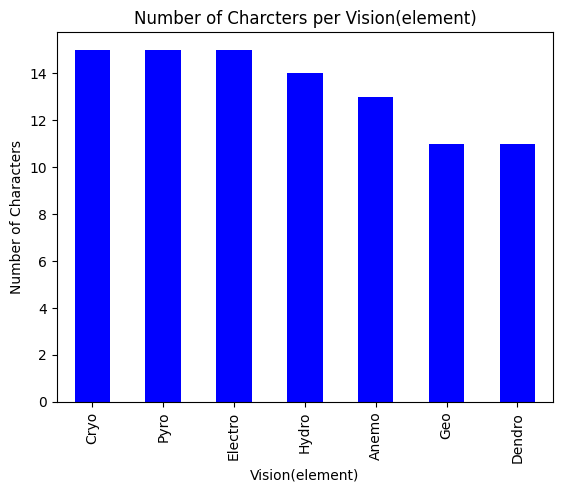

In [53]:
vision_count = df["vision"].value_counts()
vision_count.plot(kind="bar", color="blue")
plt.xlabel("Vision(element)")
plt.ylabel("Number of Characters")
plt.title("Number of Charcters per Vision(element)")
plt.show()

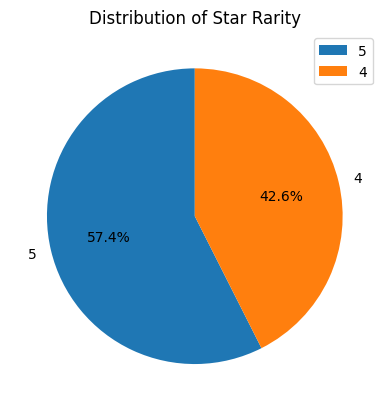

In [54]:
star_count = df["star_rarity"].value_counts()
star_count.plot(kind="pie", autopct="%1.1f%%", startangle=90, legend=True)
plt.ylabel("")
plt.title("Distribution of Star Rarity")
plt.show()

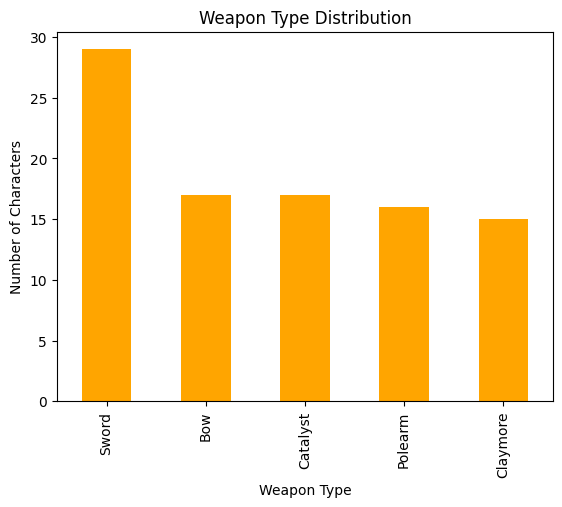

In [55]:
weapon_counts = df["weapon_type"].value_counts()
weapon_counts.plot(kind="bar", color= "orange")
plt.xlabel("Weapon Type")
plt.ylabel("Number of Characters")
plt.title("Weapon Type Distribution")
plt.show()

In [56]:
df["release_year"] = pd.to_datetime(df["release_date"], errors="coerce").dt.year


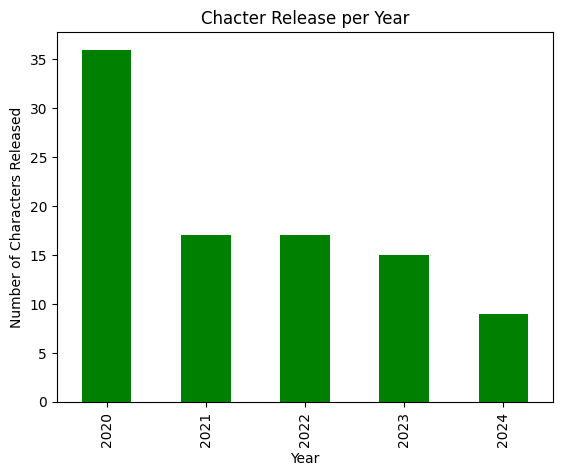

In [57]:
df["realease_year"] = pd.to_datetime(df["release_date"], errors="coerce").dt.year
releases_per_year = df.groupby('release_year').size()
releases_per_year.plot(kind="bar", color="green")
plt.xlabel("Year")
plt.ylabel("Number of Characters Released")
plt.title("Chacter Release per Year")
plt.show()

In [58]:
# "predicting" character release (kinda)
releases_per_year = df.groupby('release_year').size().reset_index(name='count')

X = releases_per_year['release_year'].dropna().values.reshape(-1, 1)
y = releases_per_year['count'].values
    
model = LinearRegression()
model.fit(X, y)

# Predict for future years (e.g., next 3 years)
future_years = np.array([2025, 2026, 2027]).reshape(-1, 1)
predictions = model.predict(future_years)
print(list(zip(future_years.flatten(), predictions)))

[(np.int64(2025), np.float64(1.999999999998181)), (np.int64(2026), np.float64(-3.600000000000364)), (np.int64(2027), np.float64(-9.200000000000728))]


In [59]:
# calculate avrg max hp per year
avg_hp_year = df.groupby("release_year")["hp_90_90"].mean().reset_index()

x = avg_hp_year["release_year"].values.reshape(-1,1)
y = avg_hp_year["hp_90_90"].values

model = LinearRegression()
model.fit(x,y)

future_years = np.array([2025, 2026, 2027]).reshape(-1,1)
predictions = model.predict(future_years)
print("Predicted avg max HP per year :", list( zip(future_years.flatten(), predictions)))

Predicted avg max HP per year : [(np.int64(2025), np.float64(12704.674509803997)), (np.int64(2026), np.float64(12964.552810457535)), (np.int64(2027), np.float64(13224.43111111119))]
